In [21]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle


X1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding = "latin1")
X2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding = "latin1")

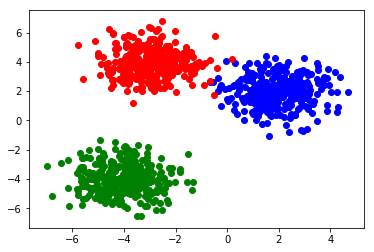

In [37]:
X1_1 = X1[np.where(label1 == 0)]
X1_2 = X1[np.where(label1 == 1)]
X1_3 = X1[np.where(label1 == 2)]


X2_1 = X2[np.where(label2 == 0)]
X2_2 = X2[np.where(label2 == 1)]
X2_3 = X2[np.where(label2 == 2)]
X2_4 = X2[np.where(label2 == 3)]
X2_5 = X2[np.where(label2 == 4)]

colors2 = ['red','green','blue','purple', 'yellow']
colors = ['red','green','blue']

plt.scatter(X1_1[:,0], X1_1[:,1], c='blue')
plt.scatter(X1_2[:,0], X1_2[:,1], c='red')
plt.scatter(X1_3[:,0], X1_3[:,1], c='green')
plt.show()

In [68]:
def get_closest(X, centroid):
    closestCen = np.zeros(len(X))
    for i in range(len(X)):
        closestCen[i] = np.argmin(np.sqrt((X[i,0] - centroid[:,0])**2 + (X[i,1] - centroid[:,1])**2))
    return closestCen

def compute_centroids(X, closestCen, centroid):
    newCentroid = np.zeros_like(centroid)
    for i in range(len(newCentroid)):
        d = X[np.where(closestCen == i)]  
        if len(d) > 0:
            newCentroid[i] = [np.mean(d[:,0]), np.mean(d[:,1])]
    return newCentroid      
def converge(centroid, newCentroid,threshold):
    if (newCentroid==centroid).all():
        return [True, 0]
        
    dist = 0
    for c, n in zip (centroid, newCentroid):        
        dist += np.sqrt((n[0] - c[0])**2 + (n[1] - c[1])**2)      
    dist = dist / len(centroid)
    return [True if dist < threshold else False, dist]

In [137]:
def kMean(X, K,threshold):
    centroid = X[np.random.choice(len(X), K)]
    finished = False
    convCrit = []
    iter = 0
    while(not finished):
        closestCen = get_closest(X, centroid)
        newCentroid = compute_centroids(X, closestCen, centroid)
        conv = converge(centroid, newCentroid,threshold)
        finished = conv[0]
        centroid = newCentroid
        convCrit.append(conv[1])
        iter += 1
    return centroid, convCrit, closestCen, iter
    

## Ex 2

end afer: 5 iterations
end afer: 5 iterations
end afer: 4 iterations
end afer: 5 iterations
end afer: 5 iterations
end afer: 6 iterations
end afer: 6 iterations
end afer: 5 iterations
end afer: 8 iterations
end afer: 13 iterations


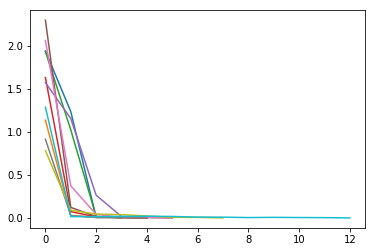

In [140]:
for i in range(10):
    centroid, conv, class_ , iter = kMean(X1, 3, 0.00001 )
    plt.plot(conv)
    print(f"end afer: {iter} iterations")

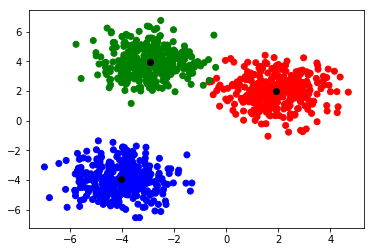

In [134]:
plt.scatter(X1[:,0], X1[:,1], c=class_, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(centroid[:,0], centroid[:,1], c='black')
plt.show()


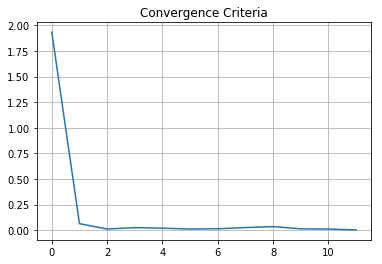

In [96]:
plt.plot(conv)
plt.title("Convergence Criteria")
plt.grid(True)
plt.show()

## Ex 3

end afer: 31 iterations
end afer: 36 iterations
end afer: 31 iterations
end afer: 31 iterations
end afer: 21 iterations
end afer: 42 iterations
end afer: 32 iterations
end afer: 36 iterations
end afer: 29 iterations
end afer: 26 iterations


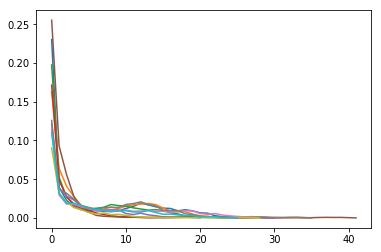

In [141]:
for i in range(10):
    centroid, conv, class_ , iter = kMean(X2, 5, 0.00001 )
    plt.plot(conv)
    print(f"end afer: {iter} iterations")

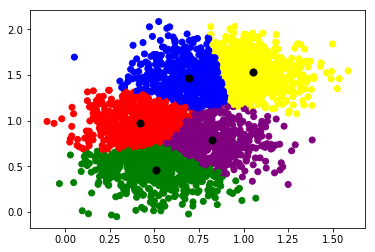

In [130]:

plt.scatter(X2[:,0], X2[:,1], c=class_, cmap=matplotlib.colors.ListedColormap(colors2))
plt.scatter(centroid2[:,0], centroid2[:,1], c='black', s=50)
plt.show()

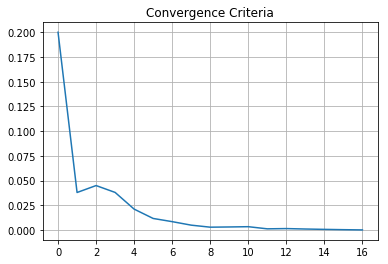

In [81]:
plt.plot(conv)
plt.title("Convergence Criteria")
plt.grid(True)
plt.show()

## Question

Do you experience sensitivity to the initial values of the centroids ? Is your strategy for
initialization working well in most cases ?


Oui c'est sensible. Le nombre d'iteration dépend fortement des postions initiales des centroides. La position des centroides peut beaucoup varié .Dans la plus part des cas elle fonctionne car elle convergera de toute facon.


Document your convergence criteria. Could you think about other convergence criteria ? 

Pour le critère on regarde si la distance moyenne entre les anciennes et les nouvelles valeurs des centroides est plus elevée qu'un seuil. on continue tant que la distance est en dessus du seuil. Pour un autre cirtère on pourrai regarder que la distance moyenne entre chaque point et son cluster est en dessous d'un seuil.


Visualize the output of your k-means on the dataset 2 and comment your results.
Ca prends plus d'iteration, ce qui est normale car il y a plus de cluster, donc la distance moyenne entre les nouveaux et les anciens centroides mais plus de d'iteration pour descendre sous le seuil. La postion des centroides de varie pas beaucoup

